# Characterising the solar spectrum

The spectrum of a star can be studied by passing its light through a diffraction grating. This was actually noticed by Fraunhofer in 1814 when he studied the spectrum of the Sun. Fraunhofer noticed dark absorption lines in the solar spectrum, and while he did not know this at the time, these lines can be used to extract information about the elements present in the Sun.

In this tutorial, we will see how the ``astrolab.spectroscopy`` module can be used to study the solar spectrum, and identify some of the elements present in it.

In [1]:
# The following lines are required so that the local ``astrolab`` package can be recognised by Python. 
# This is only necessary if you haven't installed the ``astrolab`` package on your machine.

import os
import sys
sys.path.insert(0, os.path.abspath("../../.."))

In [2]:
# Loading the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from astrolab import imaging as im
from astrolab import spectroscopy as spec

## Loading the image data

We can start by loading the image data using the `load_image` function from `astolab.imaging`. Since the solar spectrum is usually very bright, and since we are using a png image, a linear stretch is sufficient to see all the details.

**Note:** Ideally, one should not use images like jpgs and pngs from cameras, since they have been internally processed and therefore their pixel values cannot be used for scientific measurements (since they have been altered by the processing algorithms of the cameras). We should be using the raw images directly from the cameras to do this. However, for our purposes (looking at the locations of dark absorption lines) a normal png image works well. However, keep in mind that the "shape" of the resulting spectrum may not be the "true" shape, because the camera might have rescaled things unphysically to make a pretty picture.

File extension detected as PNG


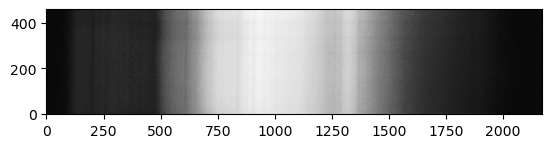

In [3]:
# Load the image

spectrum_image = im.load_image("./data/spectroscopy/solarspectrum.png", print_log=True, stretch='linear')

In the above (greyscale) image, you should be able to see a continuum of intensity, interrupted by certain dark vertical lines. These are the "Fraunhofer Lines". In order to study this "mathematically", we can plot the pixel values on two specific rows (say, rows 200 and 250, for example). This can be done easily using the ``plot`` function of ``matplotlib.pyplot``.

Text(0, 0.5, 'Intensity')

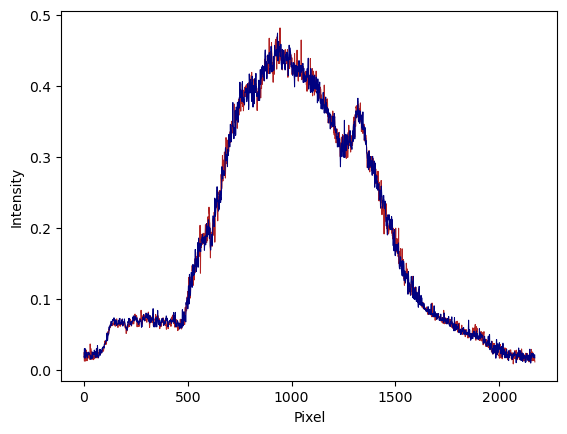

In [4]:
# Plot two horizontal "lines" of pixels from the above image

plt.plot(spectrum_image[200], color='firebrick', lw=0.75)
plt.plot(spectrum_image[230], color='navy', lw=0.75)

plt.xlabel("Pixel")
plt.ylabel("Intensity")

In the above graph, you should be able to see global features ("hills" and "valleys"), but if you carefully compare it to the image above, you will see that all the details of the "lines" seem to be washed out by the noise. This is because we are looking at a _single_ row in each case, and the signal-to-noise ratio for a single row is very poor. To improve on this, however, we should _average_ our signal vertically. We can do this using the ``get_spectrum`` function of the ``astrolab.spectroscopy`` module.

**Note:** At this point, it is important that our spectrum be perfectly horizontal. This example spectrum already is horizontal. However, if it weren't, one could use the ``rotate_spectrum`` from the ``astrolab.spectroscopy`` module.

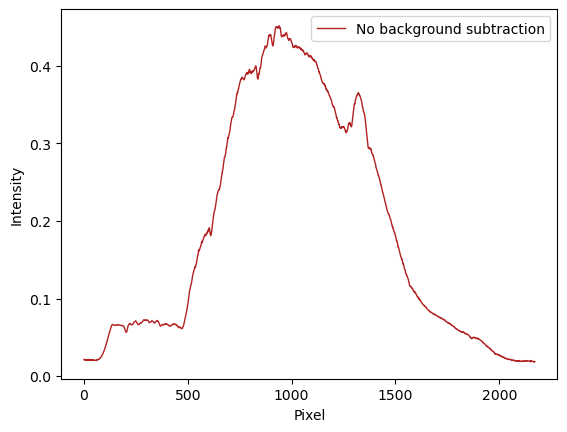

In [5]:
# Get intensity profile (spectrum) from image

spectrum = spec.get_spectrum(spectrum_image, print_log=True)

## Calibrating the spectrum 

In the above graph, we have got the intensity of each pixel as a function of its horizontal location. We know that since we are using a diffraction grating, each wavelength $\lambda$ is deviated by an angle $\theta$ given by 
\begin{equation}
d \sin\theta = n \lambda.
\end{equation}

If we are working only with the first-order diffraction pattern (so $n=1$), and if $\theta \ll 1$ (for small angles) this just means that
\begin{equation}
p_\lambda = K_1 \lambda + K_2.
\end{equation}

In other words, the relationship between pixel location and wavelength is a _linear_ one. The constants $K_1$ and $K_2$ depend on the grating, the distance from the camera, and other experimental paramters, but they are independent of wavelength. Proving the above relation in the small-angle approximation is left as an exercise. We would thus now like to go from pixel to wavelength, and to do that we need to find the constants $K_1$ and $K_2$. To do this, we need only two points whose pixel values and wavelength values are known. Once we have found two such points, we can use the `calibrate` function of the `astrolab.spectroscopy` module to obtain the wavelengths.

We can find two pixels and their corresponding wavelengths by comparing our spectrum with the Fraunhofer spectrum [obtained from Wikipedia](https://en.wikipedia.org/wiki/Fraunhofer_lines). The absorption lines are easy to spot, and two of them can be used to calibrate our spectrum.

<div>
<center>
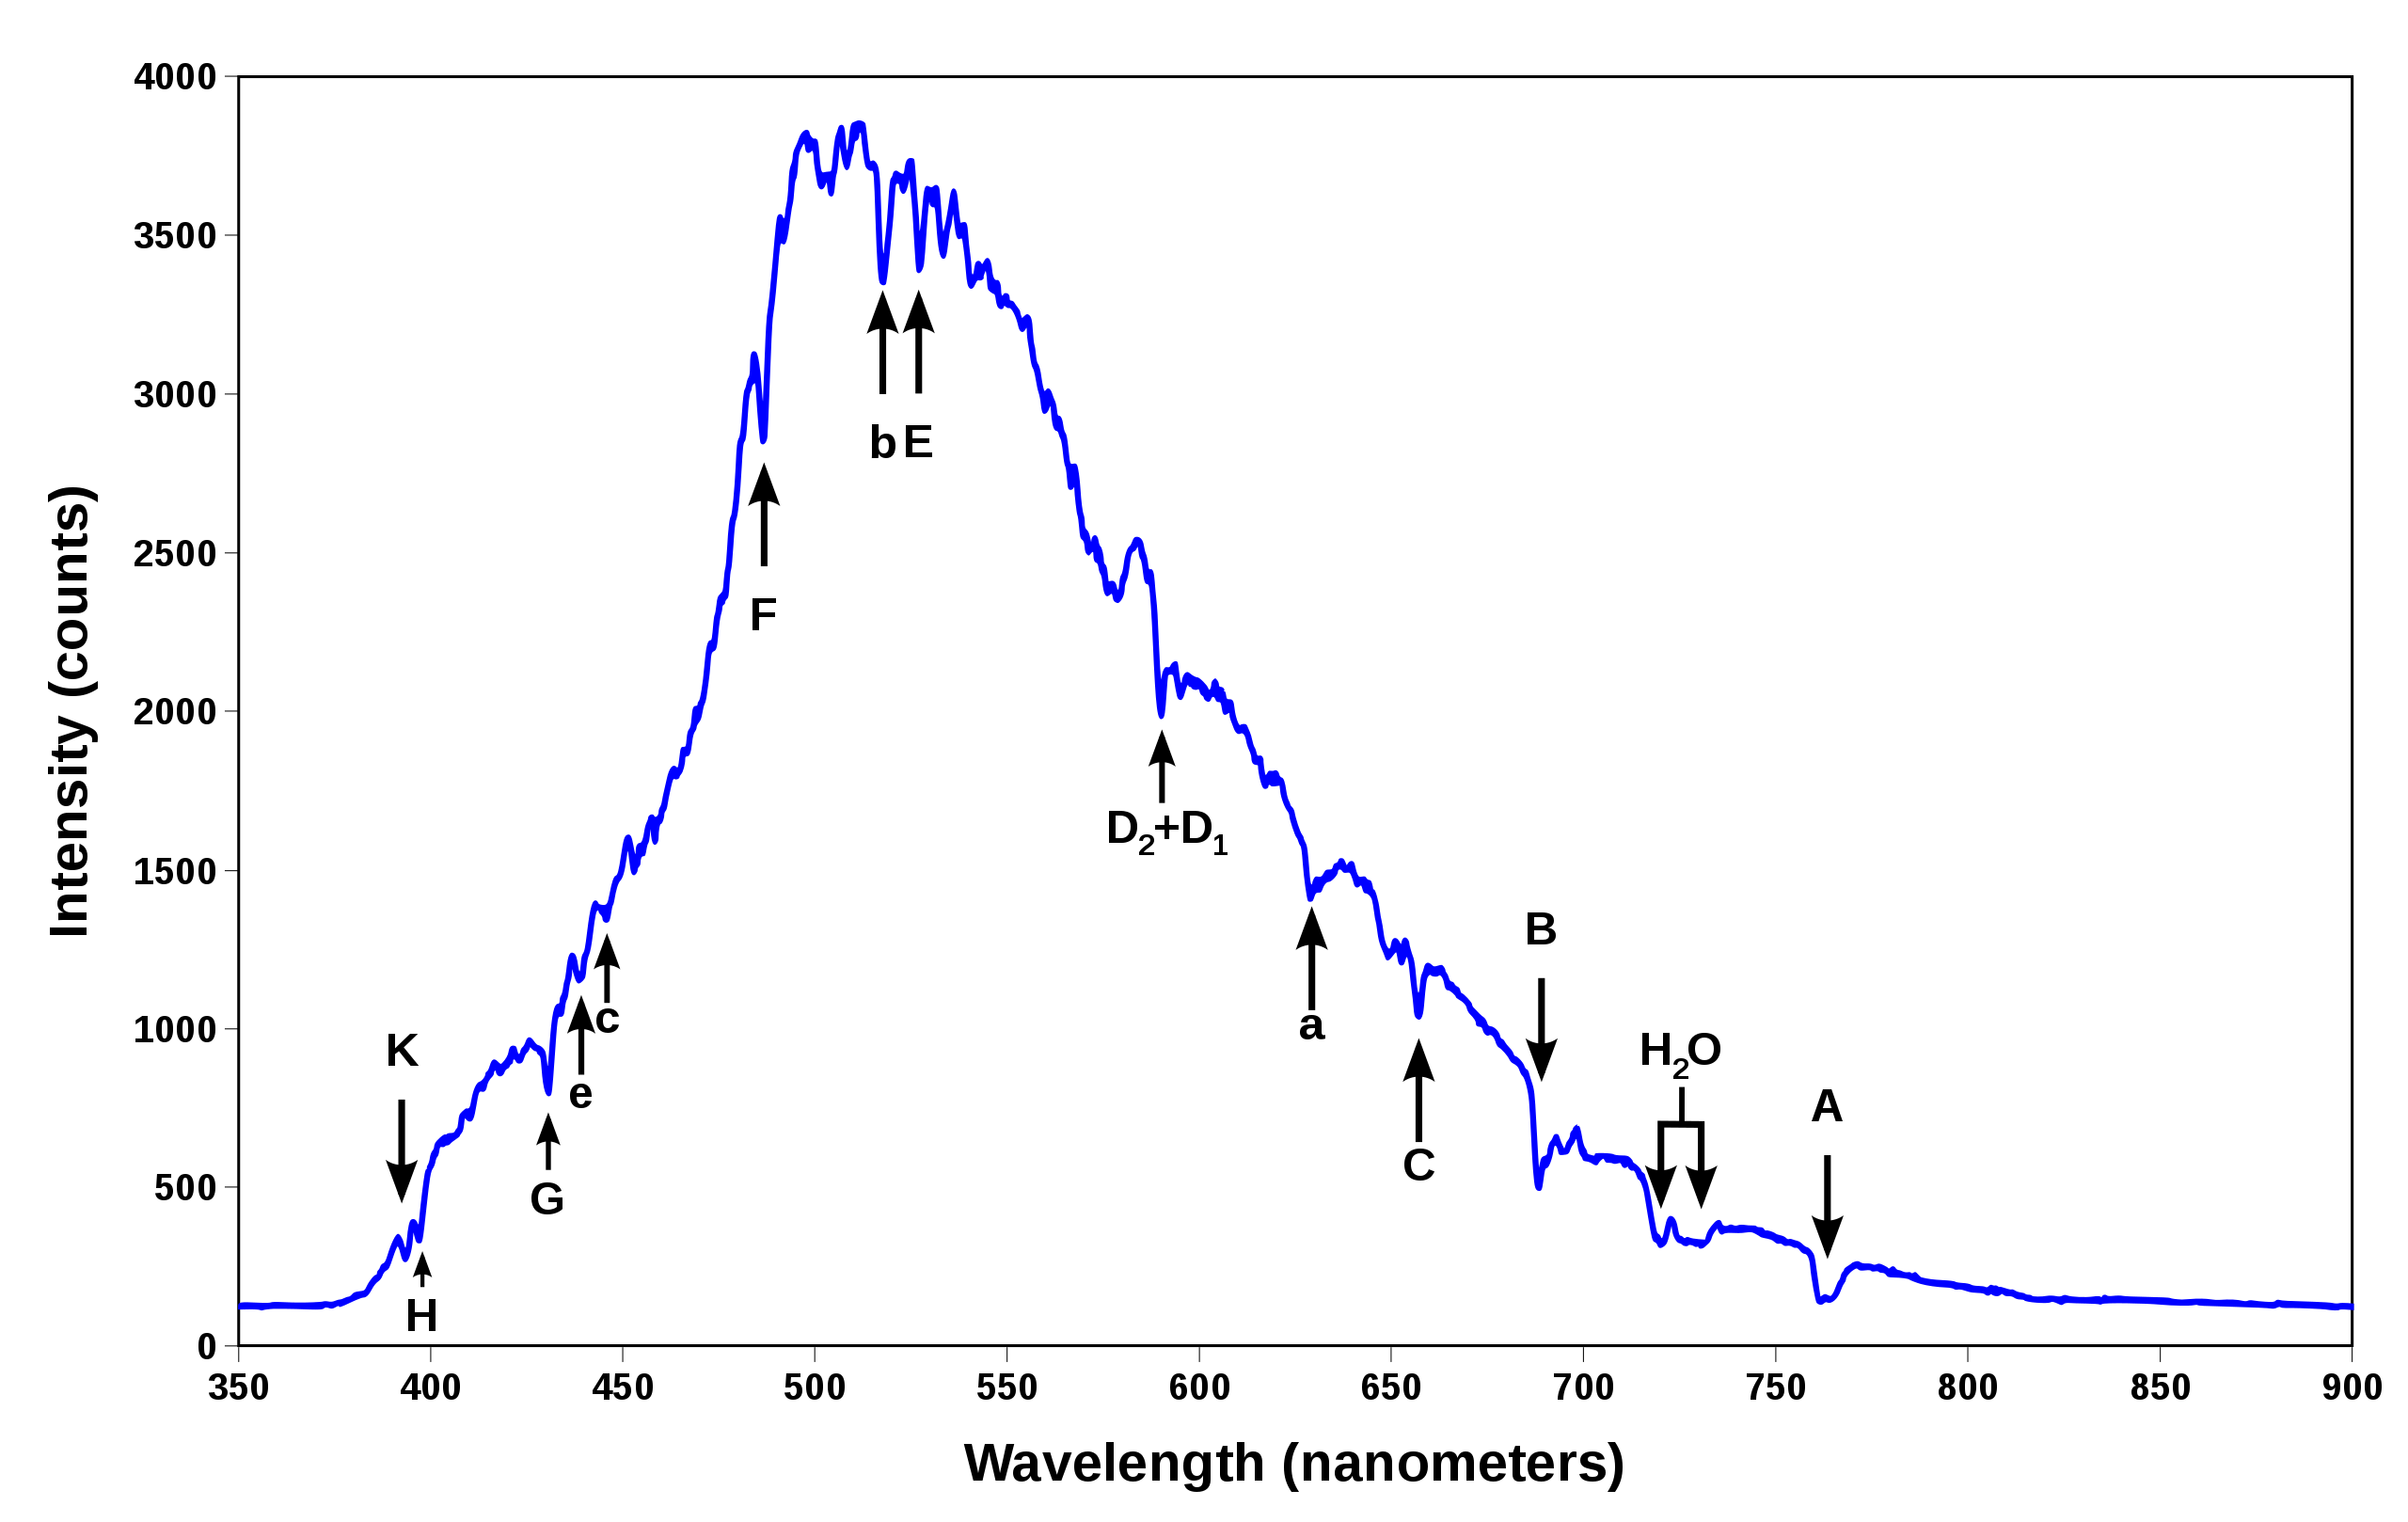
</center>
</div>

**Note:** The exact shape of the spectrum will not match ours, due to our spectrum not being calibrated to account for our camera's instrument response. However, the location of the absorption lines should nevertheless be accurate.

Let us proceed below with a guess.

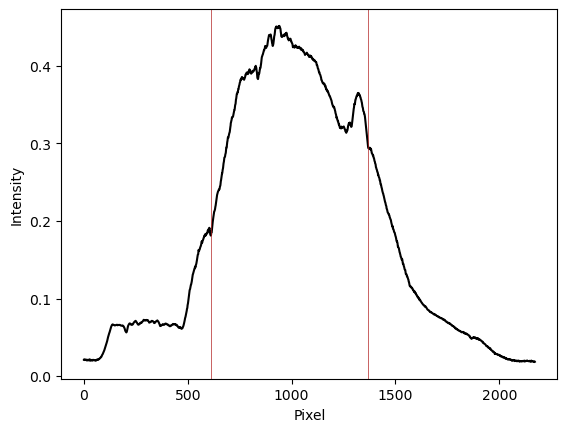

In [6]:
# Calibrating our spectrum using two-point calibration

wavelengths, AngstromsPerPix = spec.calibrate(spectrum, lineA=[1370, 5890.0], lineB=[610,4307.0], print_log=True)

## Testing our calibration

We can now plot our intensity profile as a function of wavelength rather than pixel using the ``wavelengths`` array. We can further test our results to see how well they fit by plotting the Fraunhofer lines on top of this spectrum.

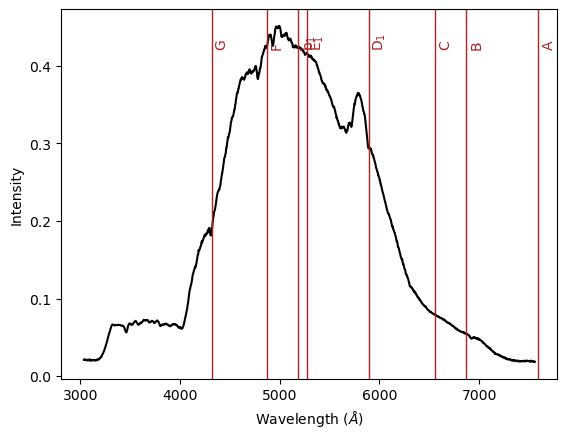

In [7]:
# Plotting the spectrum and the reference lines

fig, ax = plt.subplots() # Create a blank canvas on which to plot both the spectrum and the reference lines

ax.plot(wavelengths, spectrum, color='k')  # Plot the spectrum
spec.plot_fraunhofer(fig=fig, ax=ax, lw=1) # Plot the Fraunhofer lines

plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Intensity")
plt.show()

As can be seen, none of the lines (other than the two we used for calibration) line up with the dips in our spectrum. This is a clear sign that our initial guesses were wrong. Go back and see what should be changed to give a better fit.